In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [15]:
data = pd.read_csv("E:\logistic_regression_dataset.csv")
data.isnull().sum() 

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

In [16]:
data['is_smoking'] = data['is_smoking'].replace({'YES': 1, 'NO': 0})

In [17]:
x = data[['age']]
y = data['is_smoking']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)  

In [19]:
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)    
print("Accuracy={:2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.598113


In [21]:
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,F,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,F,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,M,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,F,0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


<AxesSubplot:xlabel='is_smoking', ylabel='age'>

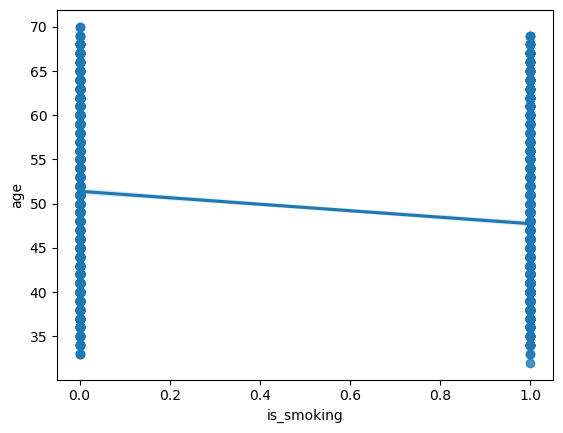

In [22]:
sns.regplot(x='is_smoking',y='age',data=data)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       544
           1       0.58      0.61      0.60       516

    accuracy                           0.60      1060
   macro avg       0.60      0.60      0.60      1060
weighted avg       0.60      0.60      0.60      1060



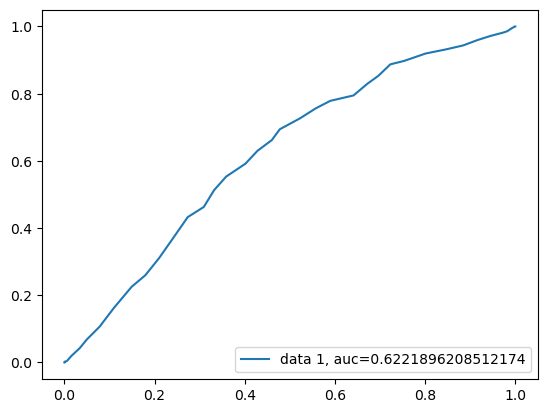

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

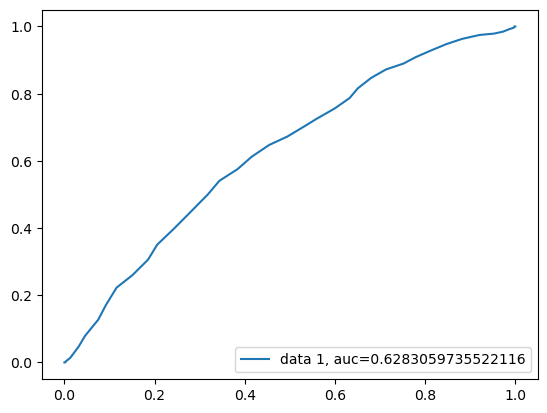

In [24]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()